In [1]:
import ilp_solver
from intuitive_algo_2 import intuitive_algo_2
from config import Config
from integer_linear_problem import Ilp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import clear_output
from tqdm import tqdm
import functools
from pprint import pprint

In [2]:
ilp_large = Ilp.from_excel(Config().DATA_LARGE_PATH)

def get_ilp(n):
    N = set(range(1, n + 1))
    # print(f'n = {n}')
    # print('ilp.w')
    # print(ilp.w)
    # print('full dataframe')
    # print(pd.DataFrame.from_dict(ilp_large.w))
    # print(f'dataframe for n = {n}')
    # print(pd.DataFrame.from_dict(ilp_large.w).iloc[:n, :n])
    w = pd.DataFrame.from_dict(ilp_large.w).iloc[:n, :n].to_dict()
    c = pd.DataFrame.from_dict(ilp_large.c).iloc[:n, :n].to_dict()
    f = pd.Series(ilp_large.f)[:n].to_dict()

    return Ilp(N, ilp_large.collection, ilp_large.transfer, ilp_large.distribution, w, c, f)

@functools.cache
def get_solve_time(n):
    sol = ilp_solver.gurobi_v1(get_ilp(n), False)
    # sol = ilp_solver.pulp_v1(get_ilp(n), False)
    # sol = intuitive_algo_2(get_ilp(n), False)
    return sol.timer.end_time - sol.timer.start_time

100%|██████████| 10/10 [00:36<00:00,  3.66s/it]


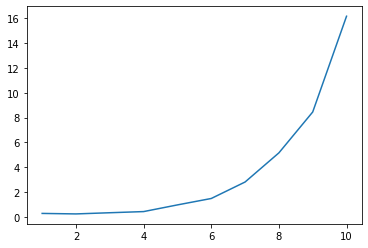

In [3]:
%matplotlib inline

MIN_N = 1
MAX_N = 10  

tc_x = np.arange(MIN_N, MAX_N + 1, 1)
solving_times = []
for n in tqdm(range(MIN_N, MAX_N + 1)):
    # if n >= 2:
    #     print('waiting..')
    #     print(ilp)
    #     input()
    solving_times.append(get_solve_time(n))
    clear_output() # flush standard output since it's not needed
plt.plot(tc_x, solving_times)
plt.show()

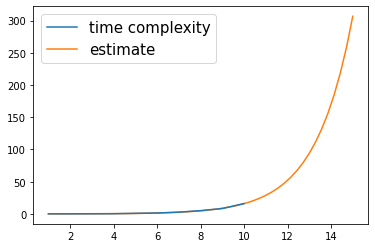

[0.07876438 1.8049035 ]
n = 15.0 gives 306.68016202537444


In [4]:
%matplotlib inline

ALPHABET = list('abcdefghijklmnopqrstuvwxyz')

# def objective(x, a, b, c, d, e):
#     return a * x**4 + b * x**5 + c * x**6 + d * x**7 + e * x**8
# def objective(x, a):
#     return a * (x) ** (x) ** (x)
# def objective(x, a):
#     return np.sqrt(2 * np.pi * a*x) * (a*x / np.e) ** (a*x)

# def objective(x, a, b):
#     return a * b**(x**2)
# def objective(x, b, c, d, e, f):
#     return b * x + c * x**2 + d * x**3 + e * x**4 + f * x**5
def objective(x, a, b):
    return a * b**((x - 1))
# def objective(x, c, e):
#     return c * (x - 1)**2 + e * (x - 1)**4

plt.plot(tc_x, solving_times, label='time complexity', zorder=3)

popt, _ = curve_fit(objective, tc_x, solving_times)
# x_arr = np.arange(min(tc_x), max(tc_x) + 1, 1)
x_arr = np.linspace(min(tc_x), 15)
y_arr = objective(x_arr, *popt)
plt.plot(x_arr, y_arr, label='estimate')
plt.legend(fontsize=15)
plt.show()

# estimate_func_1_lst = []
# estimate_func_2_lst = []
# for index, (coef, val) in enumerate(zip(ALPHABET, popt)):
#     print(f'{coef} = {val}')
#     estimate_func_1_lst.append(f'{val} * x^{index}')
#     estimate_func_2_lst.append(f'{val} * x**{index}')
# estimate_func_str_1 = ' + '.join(estimate_func_1_lst)
# estimate_func_str_2 = ' + '.join(estimate_func_2_lst)
# print(f'{estimate_func_str_1 = }')
# print(f'{estimate_func_str_2 = }')

# a, b = popt
# print(f'a = {popt[0]}', f'b = {popt[1]}')
print(popt)                 
print(f'n = {x_arr[-1]} gives {y_arr[-1]}')

In [15]:
%matplotlib widget

x_arr = np.linspace(1, 15)
# y_arr = eval(estimate_func_str_2, {'x': x_arr})
y_arr = a * b ** x_arr
plt.plot(x_arr, y_arr)
plt.show()

x = 15
print(f'x = {x}, y = {y_arr[int(np.floor(50/15 * x) - 1)]}') # not accurate

NameError: name 'a' is not defined

In [ ]:
print(f'{solving_times = }')

ratio_arr = np.zeros((len(solving_times) - 1,))

for index, (time_1, time_2) in enumerate(zip(solving_times[:-1], solving_times[1:])):
    ratio_arr[index] = time_2 / time_1

print(ratio_arr)
print(np.average(ratio_arr))

solving_times = [0.6751800000201911, 0.10933480004314333, 0.4816247000126168, 2.3858285000314936, 7.723382299998775, 24.606702800025232]
[0.1619343  4.40504487 4.95370877 3.2371909  3.18600088]
3.188775942756342


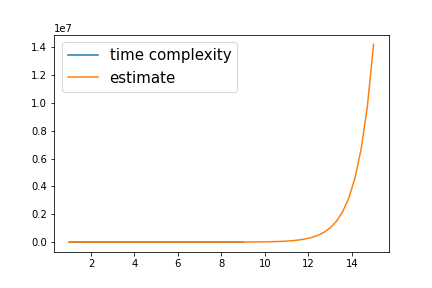

x = 15, y = 14186421.93242807


In [ ]:
%matplotlib widget

plt.plot(tc_x, solving_times, label='time complexity')

# x_arr = np.arange(min(tc_x), max(tc_x) + 1, 1)
# x_arr = np.linspace(min(tc_x), max(tc_x))
x_max = 15
x_arr = np.linspace(1, x_max)
y_arr = solving_times[0] * 3.730819111280267 ** (x_arr - 1)
plt.plot(x_arr, y_arr, label='estimate')
plt.legend(fontsize=15)
plt.show()

x = 15
print(f'x = {x}, y = {y_arr[int(np.floor(50/x_max * x) - 1)]}') # not accurate